In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Tasks:  

A . Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

B . Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views 

C . Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

D . Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [46]:
#Importing Data
df = pd.read_csv('fcc-forum-pageviews.csv', index_col ='date', parse_dates =['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


### A . Cleaning Data

In [48]:
#cleaning data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

df = df.loc[(df['value'] >= df['value'].quantile(0.025)) &
(df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923


### B. Creating a draw_line_plot 

Text(0, 0.5, 'Page Views')

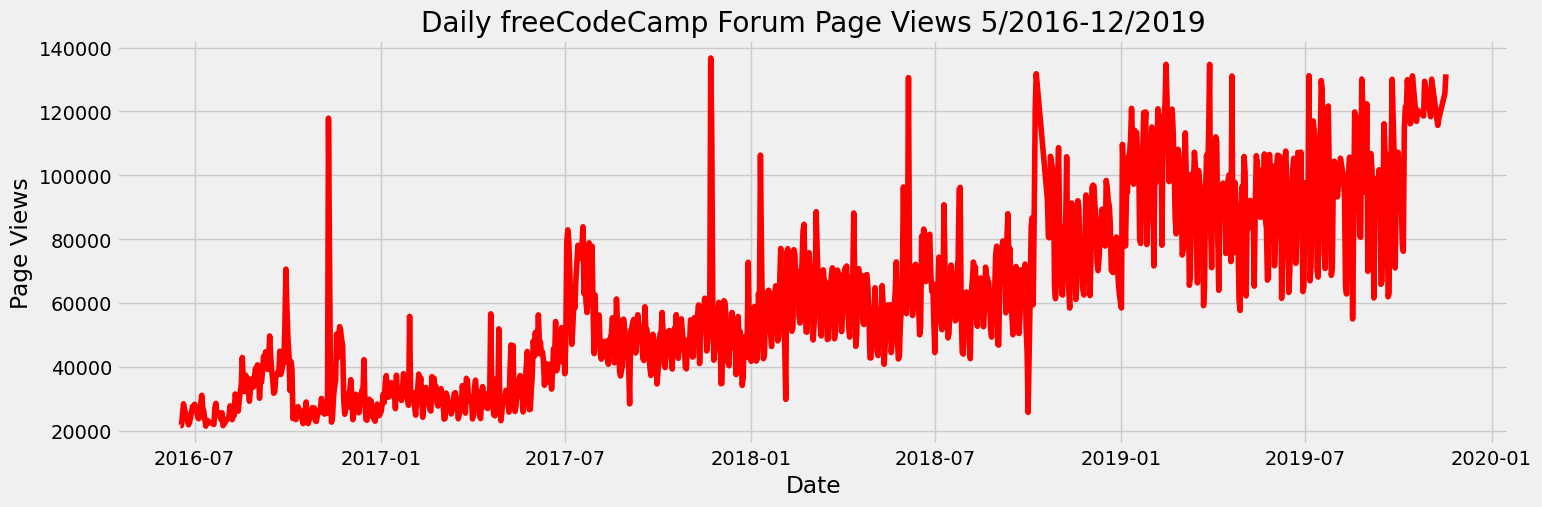

In [101]:
plt.style.use('fivethirtyeight')

fix, ax = plt.subplots(figsize=(16,5))
plt.plot(df,  color = 'red', linestyle = '-')


plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.xlabel("Date")
plt.ylabel("Page Views")

### C : Creating a bar_plot
#### step 1: Copy the df and Modify the newly created df_bar.

In [102]:
#  Copying and modifying the newly created df_bar.
df_bar = df.copy()

#Modifing the copied df
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar

,value,month,year
date,,,
2016-06-17,21691,6,2016
2016-06-18,21681,6,2016
2016-06-20,28508,6,2016
2016-06-21,26805,6,2016
2016-06-25,21923,6,2016
...,...,...,...
2019-11-03,130118,11,2019
2019-11-09,115642,11,2019
2019-11-10,117717,11,2019


#### Step 2 : Calculating average daily page views for each month grouped by year

In [103]:
# Average daily page views for each month grouped by year
df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
df_bar

year  month
2016  6         24666.777778
      7         25460.761905
      8         32154.750000
      9         41476.866667
      10        28168.250000
      11        36354.241379
      12        28690.928571
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10        84908.777778
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
      3         91214.483871
  

In [104]:
# reshaping the df-bar using the unstack()
df_bar = df_bar.unstack()
df_bar

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,24666.777778,25460.761905,32154.750000,41476.866667,28168.250000,36354.241379,28690.928571
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,84908.777778,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,97710.461538,92747.714286,111169.705882,123182.833333,NaN


In [110]:
# Renaming the columns
months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
df_bar.columns = months
df_bar

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,24666.777778,25460.761905,32154.750000,41476.866667,28168.250000,36354.241379,28690.928571
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,84908.777778,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,97710.461538,92747.714286,111169.705882,123182.833333,NaN


### Step 3: Creating the bar_plot

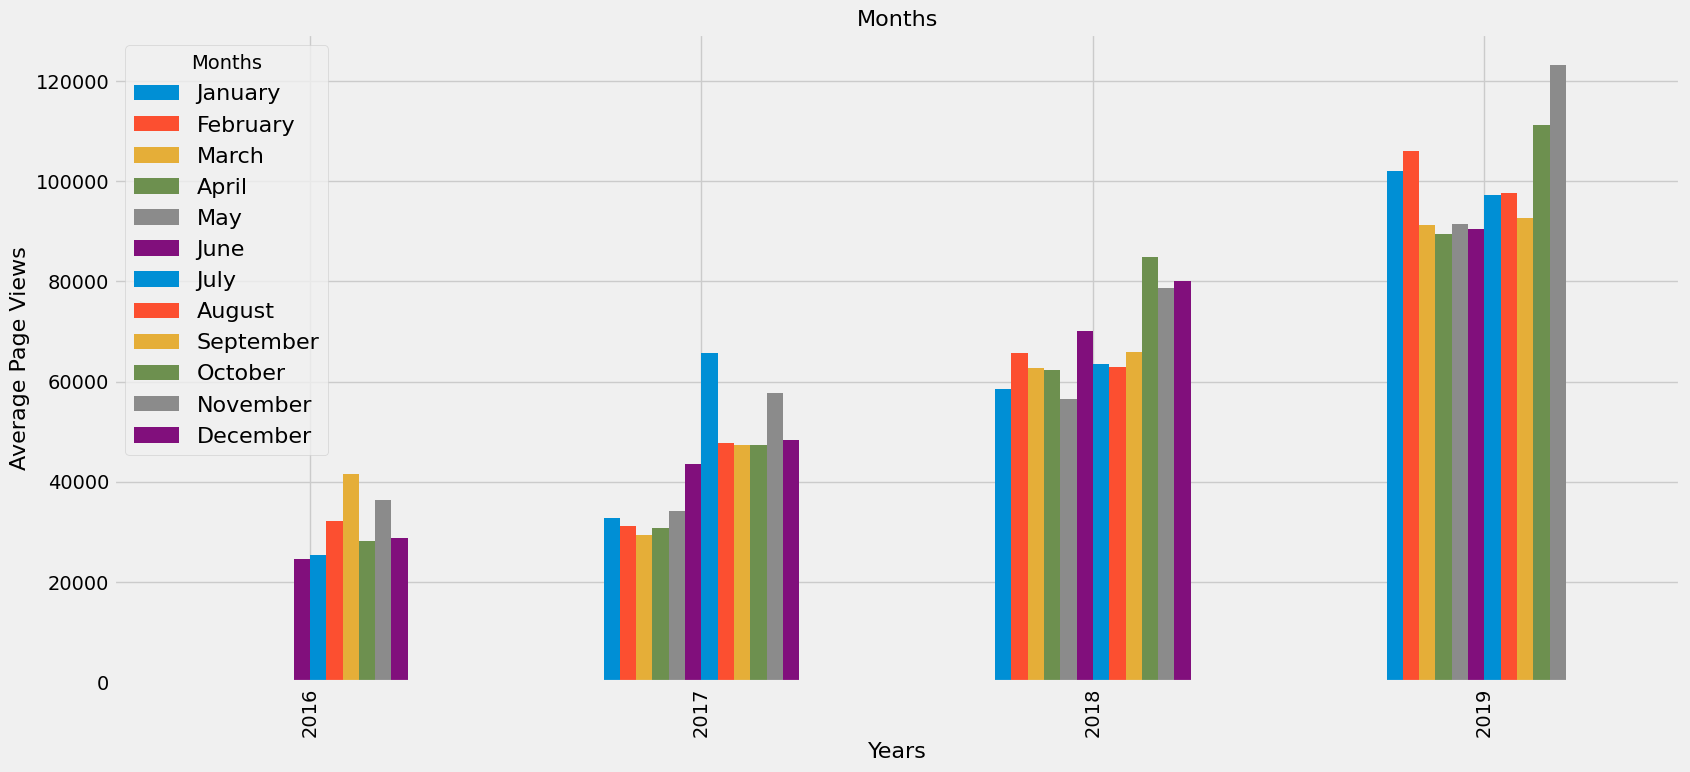

In [111]:

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(18,8))
df_bar.plot(kind = 'bar', ax =ax)

plt.title("Months", fontsize =16)
plt.xlabel("Years", fontsize =16)
plt.ylabel("Average Page Views", fontsize =16)


plt.legend(months, title = 'Months', loc = 'upper left', fontsize = 16)


### D .  Creating a box_plot

#### Step 1 : Copy and modify the new df

In [119]:
# Copying from the original df
df_box = df.copy().reset_index()
df_box

,date,value
0,2016-06-17,21691
1,2016-06-18,21681
2,2016-06-20,28508
3,2016-06-21,26805
4,2016-06-25,21923
...,...,...
1171,2019-11-03,130118
1172,2019-11-09,115642
1173,2019-11-10,117717
1174,2019-11-16,125634


In [122]:
# Modifying the newly created  df_box by creating the year and month columns
df_box['year'] = [i.year for i in df_box.date]
df_box['month'] =[i.strftime('%b') for i in df_box.date]
df_box

,date,value,year,month
0,2016-06-17,21691,2016,Jun
1,2016-06-18,21681,2016,Jun
2,2016-06-20,28508,2016,Jun
3,2016-06-21,26805,2016,Jun
4,2016-06-25,21923,2016,Jun
...,...,...,...,...
1171,2019-11-03,130118,2019,Nov
1172,2019-11-09,115642,2019,Nov
1173,2019-11-10,117717,2019,Nov
1174,2019-11-16,125634,2019,Nov


### Step 2: Creating the Box Plots

#### 1.Year-wise Box Plot (Trend) 

Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')

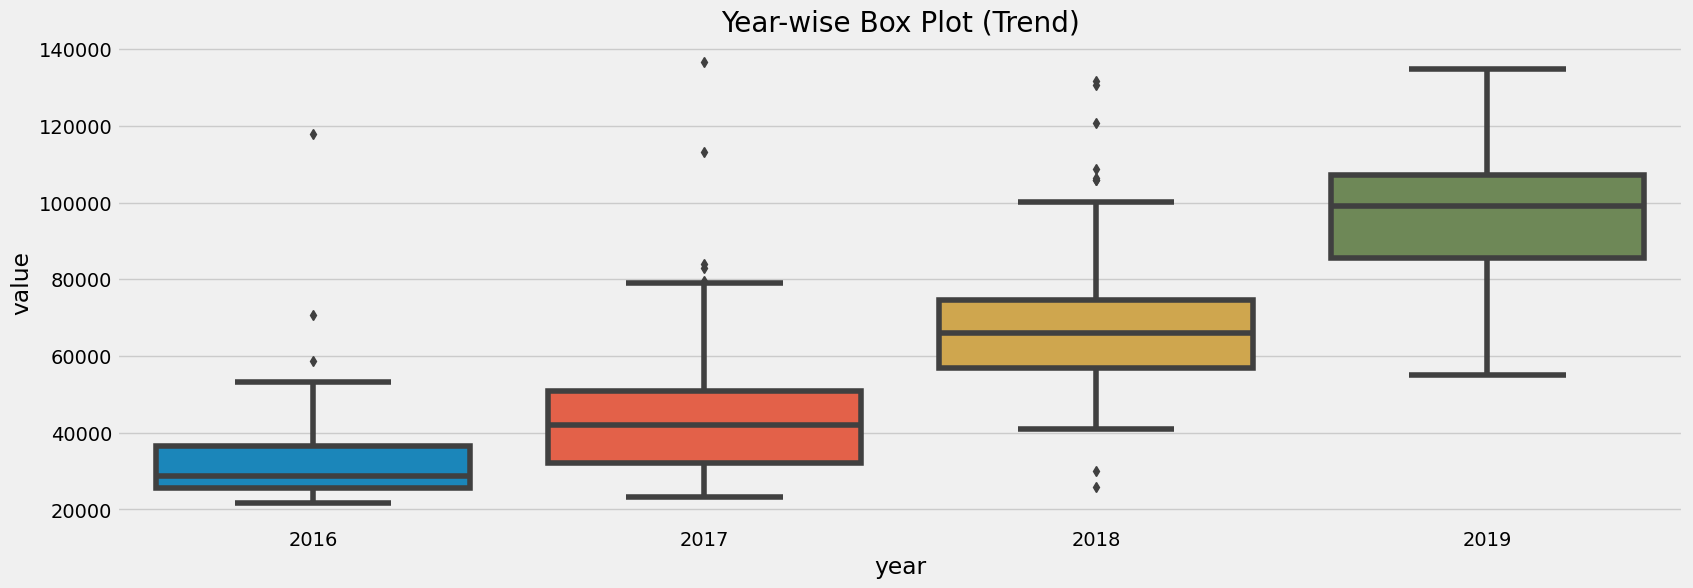

In [126]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.boxplot(data = df_box, x = 'year', y = 'value')
plt.title("Year-wise Box Plot (Trend)")

#### Month-wise Box Plot (Seasonality)

Text(0, 0.5, 'Value')

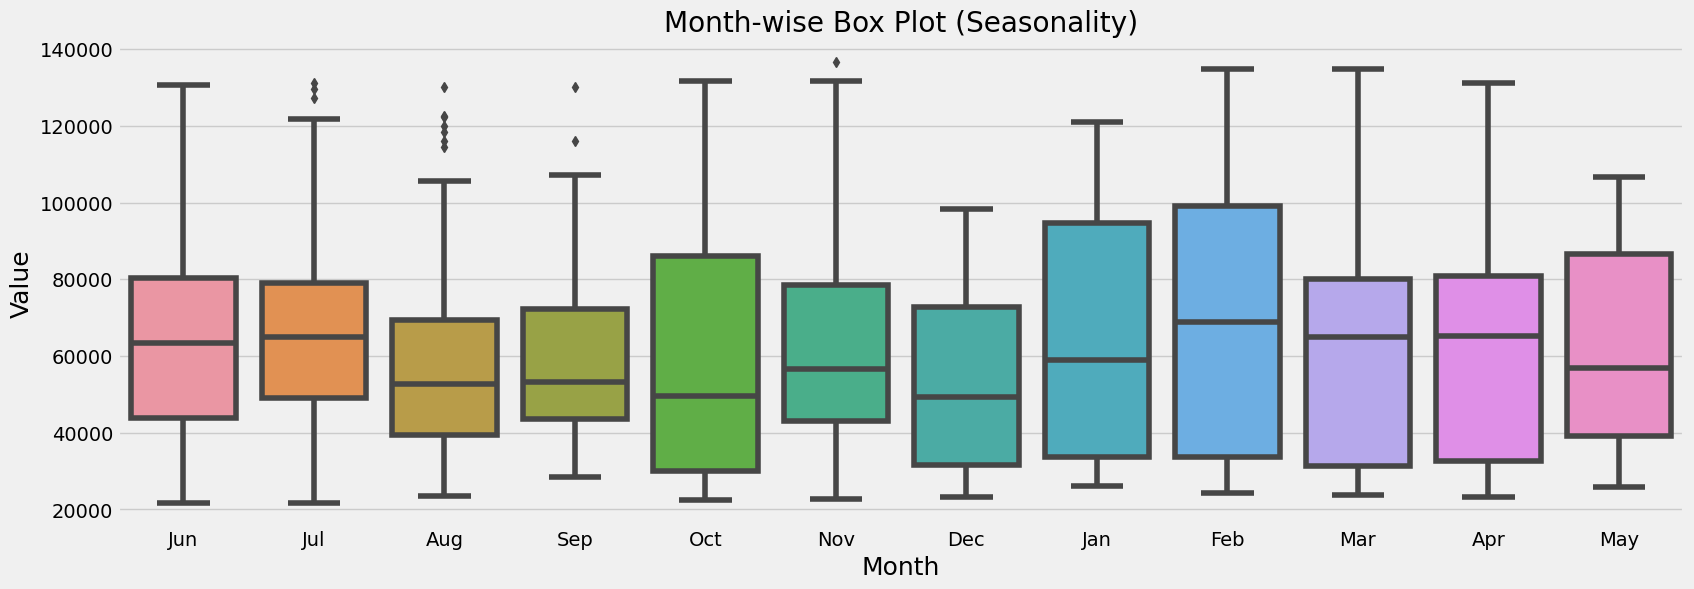

In [130]:
fig, ax = plt.subplots(figsize = (18, 6))
sns.boxplot(data =df_box, x = "month", y ='value')
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Value', fontsize = 18)

#### Month-wise Box Plot (Seasonality) Grouped by Years

Text(0, 0.5, 'Value')

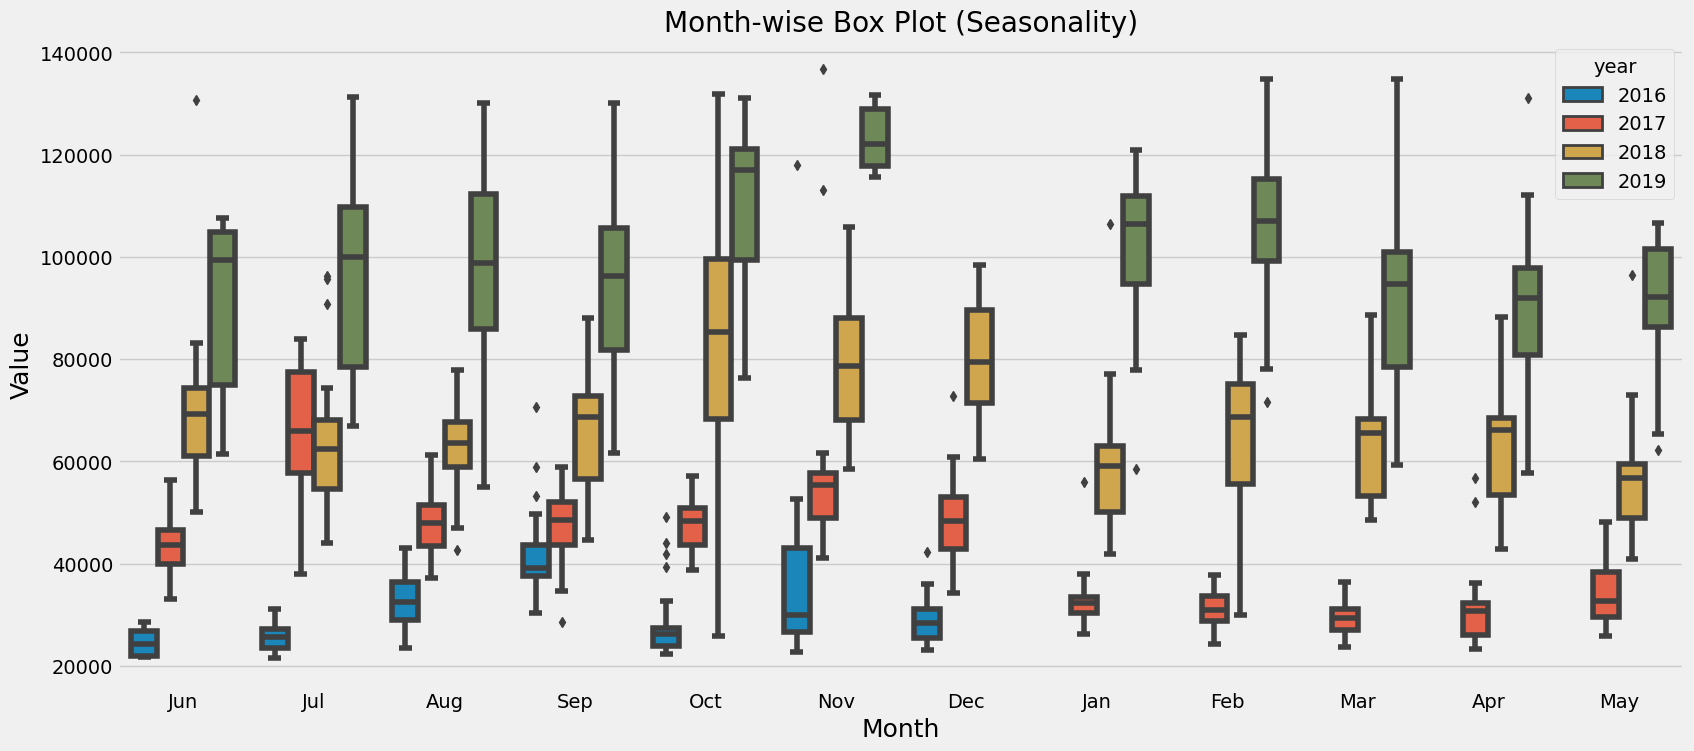

In [132]:
fig, ax = plt.subplots(figsize = (18, 8))
sns.boxplot(data =df_box, x = "month", y ='value', hue ='year')
plt.title("Month-wise Box Plot (Seasonality)")
plt.xlabel('Month', fontsize = 18)
plt.ylabel('Value', fontsize = 18)